##1) Does Claiming Crosses Have An Effect On A Goal Keepers Efficiency

In [ ]:
!python -m pip install adjustText


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Step 1 : Import Required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import html5lib
from adjustText import adjust_text

Step 2 : Read The Html File & Create Soup Table

In [ ]:
myFile=open('GoalkeepingAdv.html','r')
soup=BeautifulSoup(myFile,"html5lib")
table1 = soup.find('table')

Step 3 : Creating Column Indexs

In [ ]:
headers = []
for i in table1.find_all('th',{'scope':'col'}):
 title = i.text
 headers.append(title)
Goalkey = pd.DataFrame(columns = headers)
del Goalkey['Rk']

Step 4 : Insert Data

In [ ]:
for j in table1.find_all('tr')[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(Goalkey)
 if len(row) == 0:
   continue
 Goalkey.loc[length] = row

Step 5 : Sorting Of Data

In [ ]:
Goalkey[headers[6:15]] = Goalkey[headers[6:15]].astype('float')
Goalkey['Stp'] = Goalkey['Stp'].astype('float')
Goalkey = Goalkey[Goalkey['90s'] >= 5.56]
Goalkey = Goalkey.reset_index()
Goalkey

,index,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,...,Att,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Matches
0,0,Alisson,br BRA,GK,Liverpool,30‑027,1992.0,11.0,13.0,2.0,...,49,24.5,32.6,104,4.0,3.8,19,1.73,20.2,Matches
1,3,Gavin Bazunu,ie IRL,GK,Southampton,20‑251,2002.0,12.0,19.0,0.0,...,89,67.4,51.4,182,16.0,8.8,21,1.75,15.4,Matches
2,5,Ederson,br BRA,GK,Manchester City,29‑073,1993.0,11.0,11.0,1.0,...,53,18.9,29.6,83,8.0,9.6,18,1.64,16.9,Matches
3,6,Łukasz Fabiański,pl POL,GK,West Ham,37‑194,1985.0,11.3,10.0,1.0,...,80,52.5,40.3,162,11.0,6.8,1,0.09,9.8,Matches
4,7,David de Gea,es ESP,GK,Manchester Utd,31‑356,1990.0,11.0,16.0,1.0,...,78,71.8,52.2,160,5.0,3.1,8,0.73,13.4,Matches
5,8,Vicente Guaita,es ESP,GK,Crystal Palace,35‑292,1987.0,11.0,16.0,0.0,...,92,43.5,34.5,174,16.0,9.2,13,1.18,12.1,Matches
6,9,Dean Henderson,eng ENG,GK,Nott'ham Forest,25‑231,1997.0,12.0,23.0,1.0,...,111,52.3,42.7,204,15.0,7.4,19,1.58,15.3,Matches
7,10,Bernd Leno,de GER,GK,Fulham,30‑239,1992.0,10.0,20.0,2.0,...,69,39.1,36.5,125,13.0,10.4,14,1.40,14.0,Matches
8,11,Hugo Lloris,fr FRA,GK,Tottenham,35‑307,1986.0,12.0,14.0,1.0,...,102,21.6,24.6,162,11.0,6.8,17,1.42,14.4,Matches
9,12,Emiliano Martínez,ar ARG,GK,Aston Villa,30‑057,1992.0,12.0,16.0,1.0,...,77,46.8,40.8,136,23.0,16.9,6,0.50,11.4,Matches


Step 6 : Plotting Of Required Data

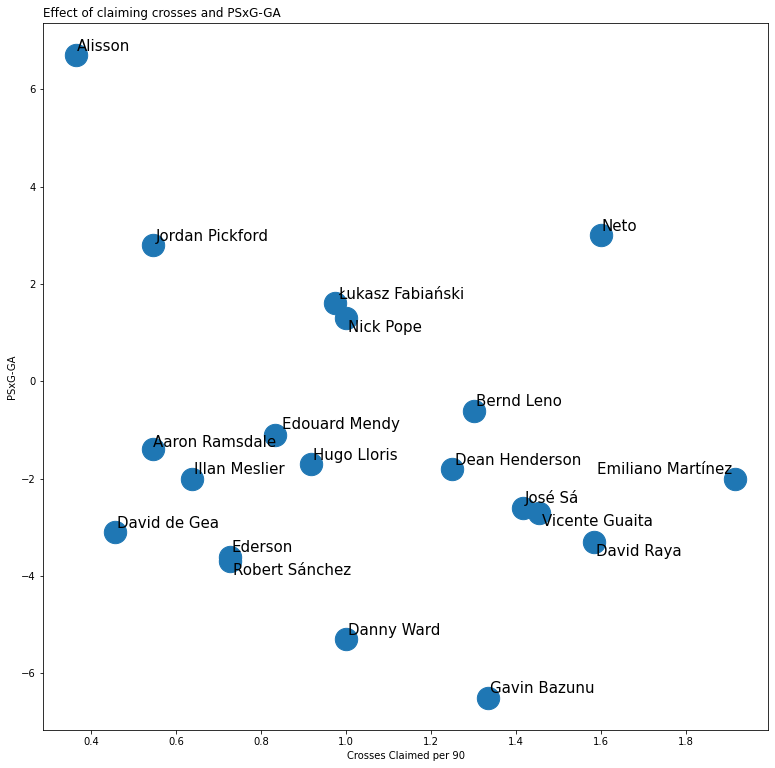

In [ ]:
Goalkey['PSxG-GA'] = Goalkey['PSxG']- Goalkey['GA']
Goalkey['CrossesClaimed/90'] = Goalkey['Stp']/Goalkey['90s']

fig, ax = plt.subplots(figsize = (13, 13))

ax.scatter(Goalkey['CrossesClaimed/90'], Goalkey['PSxG-GA'], s=500)
texts1=[plt.text(Goalkey['CrossesClaimed/90'][i], Goalkey['PSxG-GA'][i], Goalkey['Player'][i], size = 15) for i in range(len(Goalkey))]
adjust_text(texts1)
plt.title("Effect of claiming crosses and PSxG-GA", loc = 'left')
plt.ylabel("PSxG-GA")

plt.xlabel("Crosses Claimed per 90")
fig.savefig('goalkeep.jpg', bbox_inches='tight', dpi=150)
plt.show()

##2) Creativity Of Forwards In The Premier League 2022-23

Step 1 : Read The Html File & Create Soup Table

In [ ]:
myFile=open('PassingStats.html','r')
soup=BeautifulSoup(myFile,"html5lib")
table1 = soup.find('table')

In [ ]:
myFile=open('/content/SCAper90.html','r')
soup=BeautifulSoup(myFile,"html5lib")
table = soup.find('table')

Step 2 : Creating Column Indexs

In [ ]:
headers = []
for i in table1.find_all('th',{'scope':'col'}):
 title = i.text
 headers.append(title)
passstat = pd.DataFrame(columns = headers)
del passstat['Rk']

In [ ]:
headers = []
for i in table.find_all('th',{'scope':'col'}):
 title = i.text
 headers.append(title)
SCA_data = pd.DataFrame(columns = headers)
del SCA_data['Rk']

Step 3: Insert Data

In [ ]:
for j in table1.find_all('tr')[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(passstat)
 if len(row) == 0:
   continue
 passstat.loc[length] = row

In [ ]:
for j in table.find_all('tr')[2:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(SCA_data)
 if len(row) == 0:
   continue
 SCA_data.loc[length] = row

Step 4 : Sorting Of Data

In [ ]:
passstat['90s'] = passstat['90s'].astype('float')
passstat['Pos'] = passstat['Pos'].astype('str')
passstat = passstat[passstat['90s'] >= 5.56]
passstat = passstat[(passstat['Pos'] == 'FW,MF') | (passstat['Pos'] ==  'FW')]
passstat = passstat.reset_index()

In [ ]:
passstat =passstat.merge(SCA_data, on = 'Player')
passstat

,index,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,xAG,xA,A‑xAG,KP,1/3,PPA,CrsPA,Prog,Matches,SCA90
0,1,Che Adams,sct SCO,FW,Southampton,26‑108,1996,9.1,14.4,21.2,...,0.13,0.09,‑0.02,1.32,0.66,0.55,0.22,0.99,Matches,2.08
1,13,Miguel Almirón,py PAR,FW,Newcastle Utd,28‑261,1994,11.1,27.7,33.0,...,0.05,0.10,‑0.05,0.63,1.71,1.44,0.18,2.97,Matches,2.88
2,19,Michail Antonio,jm JAM,FW,West Ham,32‑215,1990,5.9,8.98,17.5,...,0.07,0.03,0.10,1.02,0.68,0.68,0.17,0.85,Matches,2.73
3,31,Jordan Ayew,gh GHA,"FW,MF",Crystal Palace,31‑048,1991,8.1,20.4,25.8,...,0.12,0.11,0.00,1.48,0.86,0.25,0.25,1.11,Matches,3.09
4,34,Leon Bailey,jm JAM,"FW,MF",Aston Villa,25‑081,1997,7.6,16.6,26.8,...,0.21,0.24,0.05,1.32,0.66,1.18,0.79,1.18,Matches,2.78
5,56,Emi Buendía,ar ARG,"FW,MF",Aston Villa,25‑308,1996,5.7,38.2,48.2,...,0.14,0.11,‑0.14,2.11,4.91,2.81,0.00,6.32,Matches,4.72
6,112,Luis Díaz,co COL,"FW,MF",Liverpool,25‑289,1997,6.8,29.9,37.6,...,0.15,0.12,0.15,0.88,2.65,0.74,0.15,2.21,Matches,2.94
7,127,Odsonne Édouard,fr FRA,FW,Crystal Palace,24‑286,1998,7.6,17.0,22.0,...,0.09,0.05,0.17,0.92,0.66,0.79,0.00,1.84,Matches,2.62
8,142,Roberto Firmino,br BRA,"FW,MF",Liverpool,31‑027,1991,7.7,33.6,43.6,...,0.21,0.21,0.18,1.69,3.64,1.56,0.00,4.55,Matches,3.77
9,144,Phil Foden,eng ENG,"FW,MF",Manchester City,22‑154,2000,8.6,45.9,55.8,...,0.20,0.21,0.27,2.09,2.67,2.09,0.93,2.79,Matches,4.63


Step 5 : Plotting Of Required Data

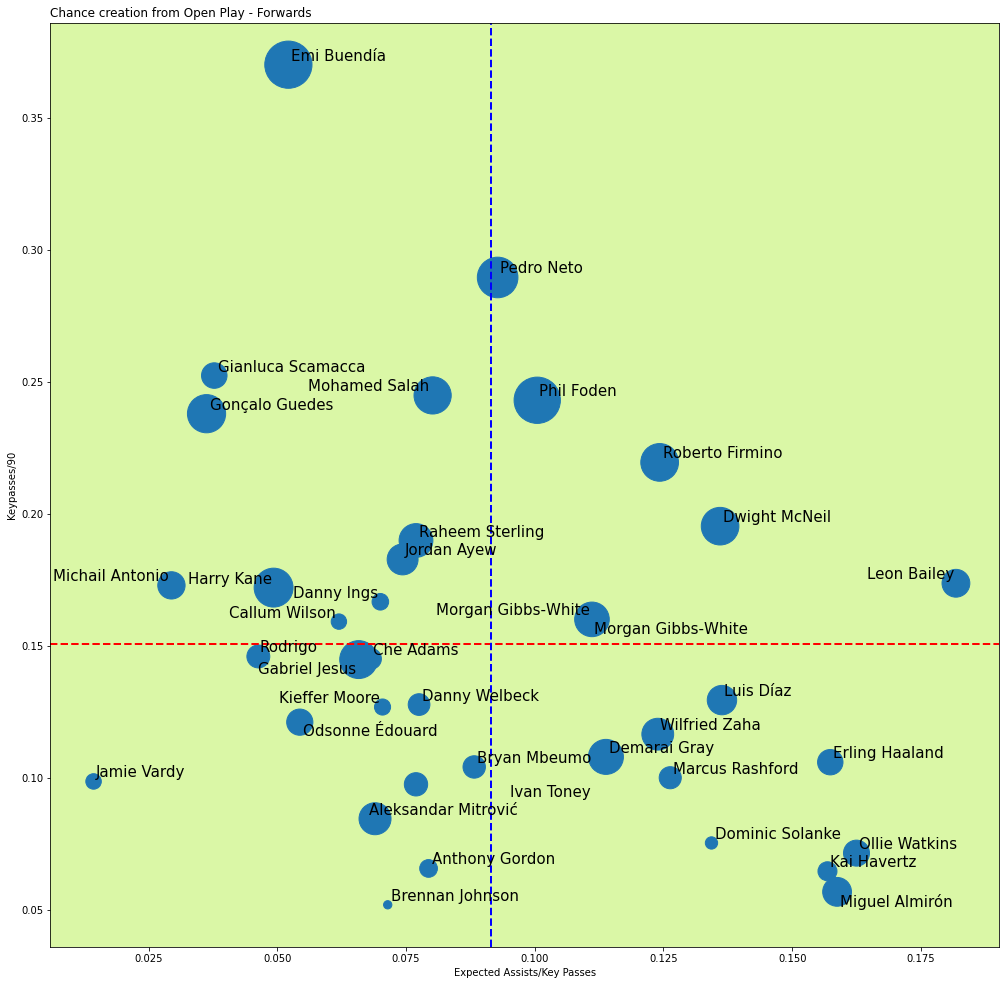

In [ ]:
passstat['xA'] = passstat['xA'].astype('float')
passstat['90s'] = passstat['90s'].astype('float')
passstat['KP'] = passstat['KP'].astype('float')
passstat['SCA90'] = passstat['SCA90'].astype('float')
passstat['KP/90'] = passstat['KP']/passstat['90s']
passstat['xA/KP'] = passstat['xA']/passstat['KP']
size = passstat['SCA90'].to_numpy()
s = [100*s**2 for s in size]
fig, ax = plt.subplots(figsize = (17, 17))

ax.scatter(passstat['xA/KP'],passstat['KP/90'], s=s)
# plt.locator_params('x', nbins = 5)
plt.title("Chance creation from Open Play - Forwards", loc = 'left')
texts=[plt.text(passstat['xA/KP'][i], passstat['KP/90'][i], passstat['Player'][i], size = 15) for i in range(len(passstat))]
plt.ylabel("Keypasses/90")
plt.xlabel("Expected Assists/Key Passes")
ax.set_facecolor('#DAF7A6')
plt.axhline(y=np.nanmean(passstat['KP/90']), color='red', linestyle='--', linewidth=2, label='Avg')
plt.axvline(x=np.nanmean(passstat['xA/KP']), color='blue', linestyle='--', linewidth=2, label='Avg')
adjust_text(texts)
fig.savefig('passstat.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
df1 = pd.read_csv("shooting.csv", encoding='latin-1', header = 1)
df1['90s'] = df1['90s'].astype('float')
df1['Pos'] = df1['Pos'].astype('str')
df1 = df1[df1['90s'] >= 3]
df1 = df1.reset_index()
df1 = df1[(df1['Pos'] == 'FW') | (df1['Pos'] == 'FW,MF')]
df1 = df1.reset_index()
df1

,level_0,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,1,2,Che Adams,sct SCO,FW,Southampton,26-109,1996,10.1,...,14.8,0,0,0,3.2,3.2,0.13,-0.2,-0.2,Matches
1,11,13,14,Miguel Almirón,py PAR,FW,Newcastle Utd,28-262,1994,12.1,...,17.2,0,0,0,4.3,4.3,0.13,2.7,2.7,Matches
2,12,14,15,Julián Álvarez,ar ARG,"FW,MF",Manchester City,22-272,2000,3.3,...,16.3,0,0,0,0.8,0.8,0.12,1.2,1.2,Matches
3,15,19,20,Michail Antonio,jm JAM,FW,West Ham,32-216,1990,5.9,...,13.0,0,0,0,2.0,2.0,0.16,0.0,0.0,Matches
4,21,30,31,Taiwo Awoniyi,ng NGA,"FW,MF",Nott'ham Forest,25-079,1997,4.9,...,11.1,0,0,0,3.4,3.4,0.25,-0.4,-0.4,Matches
5,25,36,37,Patrick Bamford,eng ENG,"FW,MF",Leeds United,29-055,1993,4.8,...,14.3,0,0,1,4.1,3.3,0.21,-4.1,-3.3,Matches
6,41,64,65,Dominic Calvert-Lewin,eng ENG,FW,Everton,25-228,1997,3.1,...,7.4,0,0,0,1.0,1.0,0.24,0.0,0.0,Matches
7,58,92,93,Diego Costa,es ESP,FW,Wolves,34-023,1988,4.6,...,11.7,0,0,0,1.4,1.4,0.09,-1.4,-1.4,Matches
8,63,98,99,Patson Daka,zm ZAM,FW,Leicester City,24-021,1998,5.6,...,14.8,0,0,0,1.7,1.7,0.13,1.3,1.3,Matches
9,72,114,115,Luis Díaz,co COL,"FW,MF",Liverpool,25-290,1997,6.8,...,13.3,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches


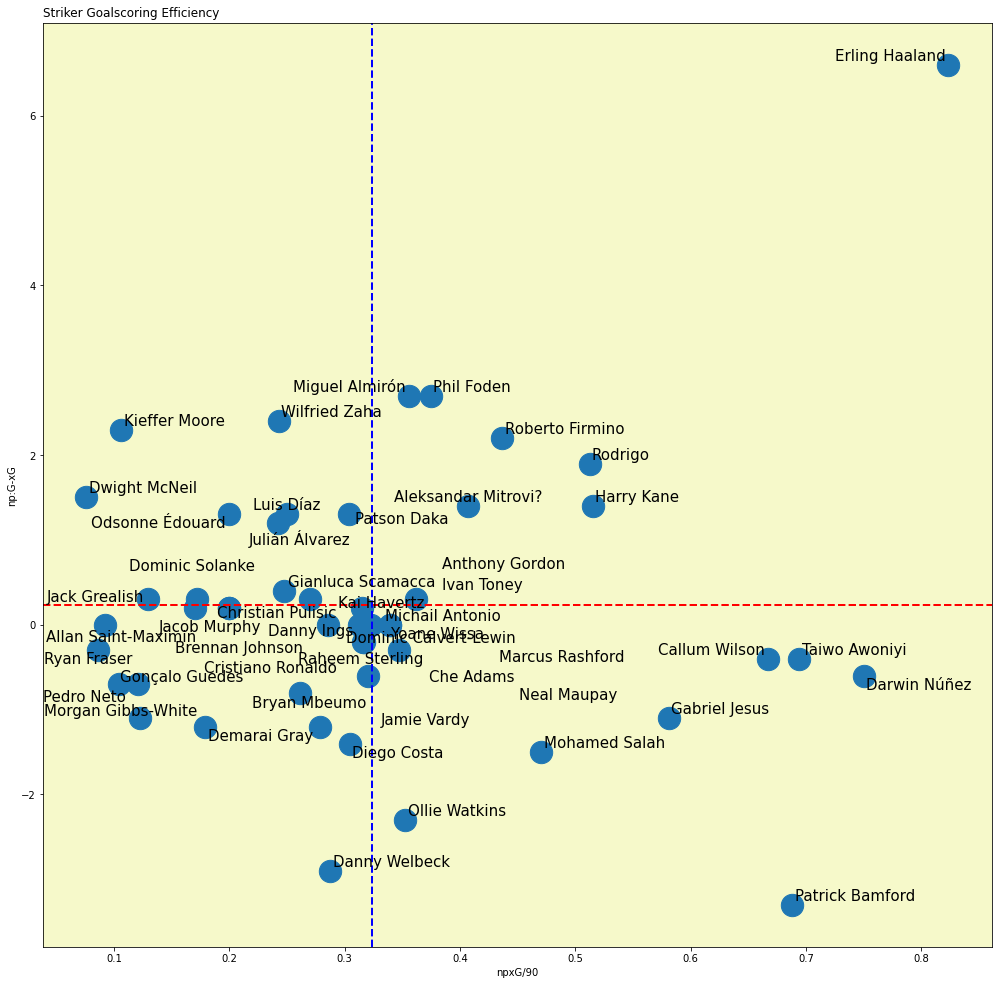

In [ ]:
df1['npxG'] = df1['npxG'].astype('float')
df1['90s'] = df1['90s'].astype('float')
df1['Sh'] = df1['Sh'].astype('float')
df1['SoT/90'] = df1['SoT/90'].astype('float')
df1['npxG/90'] = df1['npxG']/df1['90s']
df1['np:G-xG'] = df1['np:G-xG'].astype('float')
fig, ax = plt.subplots(figsize = (17, 17))
ax.scatter(df1['npxG/90'],df1['np:G-xG'], s=500)
# plt.locator_params('x', nbins = 5)
texts2=[plt.text(df1['npxG/90'][i], df1['np:G-xG'][i],df1['Player'][i], size = 15) for i in range(0,49)]
plt.title("Striker Goalscoring Efficiency", loc = 'left')
plt.ylabel("np:G-xG")
plt.xlabel("npxG/90")
ax.set_facecolor('#f6f9ca')
adjust_text(texts2)
plt.axhline(y=np.nanmean(df1['np:G-xG']), color='red', linestyle='--', linewidth=2, label='Avg')
plt.axvline(x=np.nanmean(df1['npxG/90']), color='blue', linestyle='--', linewidth=2, label='Avg')
fig.savefig('df1.jpg', bbox_inches='tight', dpi=150)
plt.show()

In [ ]:
df2 = pd.read_csv("PassingStats.csv", encoding='latin-1', header = 1)
df2

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,...,Ast,xAG,xA,A-xAG,KP,01-Mar,PPA,CrsPA,Prog,Matches
0,1,Brenden Aaronson,us USA,MF,Leeds United,22-008,2000,11.3,272,367,...,1,2.4,1.3,-1.4,24,22,5,2,24,Matches
1,2,Che Adams,sct SCO,FW,Southampton,26-109,1996,10.1,147,214,...,1,1.4,0.9,-0.4,14,7,5,2,9,Matches
2,3,Tyler Adams,us USA,MF,Leeds United,23-258,1999,11.0,519,639,...,0,0.9,0.6,-0.9,14,49,6,0,50,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-036,1997,10.0,389,488,...,0,0.0,0.1,0.0,1,22,2,0,28,Matches
4,5,Rayan Aït Nouri,fr FRA,DF,Wolves,21-146,2001,7.2,302,365,...,0,0.8,0.7,-0.8,6,21,12,5,25,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,Wilfried Zaha,ci CIV,"FW,MF",Crystal Palace,29-354,1992,10.7,230,293,...,1,1.4,1.4,-0.4,12,7,15,1,20,Matches
457,458,Jordan Zemura,zw ZIM,DF,Bournemouth,22-350,1999,7.8,202,292,...,1,0.7,0.7,0.3,9,18,5,1,16,Matches
458,459,Oleksandr Zinchenko,ua UKR,DF,Arsenal,25-319,1996,4.4,268,304,...,1,0.3,0.6,0.7,2,27,6,2,19,Matches
459,460,Hakim Ziyech,ma MAR,MF,Chelsea,29-225,1993,1.5,47,72,...,0,0.1,0.1,-0.1,3,5,2,0,3,Matches


In [ ]:
df2['90s'] = df2['90s'].astype('float')
df2['Pos'] = df2['Pos'].astype('str')
df2 = df2[df2['90s'] >= 5.56]
df2 = df2.reset_index()
df2 = df2[(df2['Pos'] == 'DF')]
df2 = df2[df2['KP'] != 0]
df2 = df2.reset_index()
df2

,level_0,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,...,Ast,xAG,xA,A-xAG,KP,01-Mar,PPA,CrsPA,Prog,Matches
0,3,3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-036,1997,10.0,...,0,0.0,0.1,0.0,1,22,2,0,28,Matches
1,4,4,5,Rayan Aït Nouri,fr FRA,DF,Wolves,21-146,2001,7.2,...,0,0.8,0.7,-0.8,6,21,12,5,25,Matches
2,7,10,11,Trent Alexander-Arnold,eng ENG,DF,Liverpool,24-023,1998,9.0,...,0,1.8,2.2,-1.8,23,67,32,10,68,Matches
3,10,15,16,Daniel Amartey,gh GHA,DF,Leicester City,27-313,1994,8.2,...,0,0.3,0.3,-0.3,3,36,0,0,25,Matches
4,11,16,17,Joachim Andersen,dk DEN,DF,Crystal Palace,26-152,1996,11.0,...,0,0.4,0.2,-0.4,4,41,3,0,23,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,221,444,445,Ben White,eng ENG,DF,Arsenal,25-022,1997,9.8,...,2,0.9,1.1,1.1,8,64,13,3,44,Matches
70,222,445,446,Neco Williams,wls WAL,DF,Nott'ham Forest,21-200,2001,10.6,...,0,1.0,0.8,-1.0,10,16,10,8,19,Matches
71,226,452,453,Joe Worrall,eng ENG,DF,Nott'ham Forest,25-293,1997,6.7,...,0,0.5,0.3,-0.5,2,33,0,0,16,Matches
72,229,455,456,Ashley Young,eng ENG,DF,Aston Villa,37-113,1985,7.7,...,0,0.7,0.4,-0.7,9,22,9,3,27,Matches


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0, flags=flags)


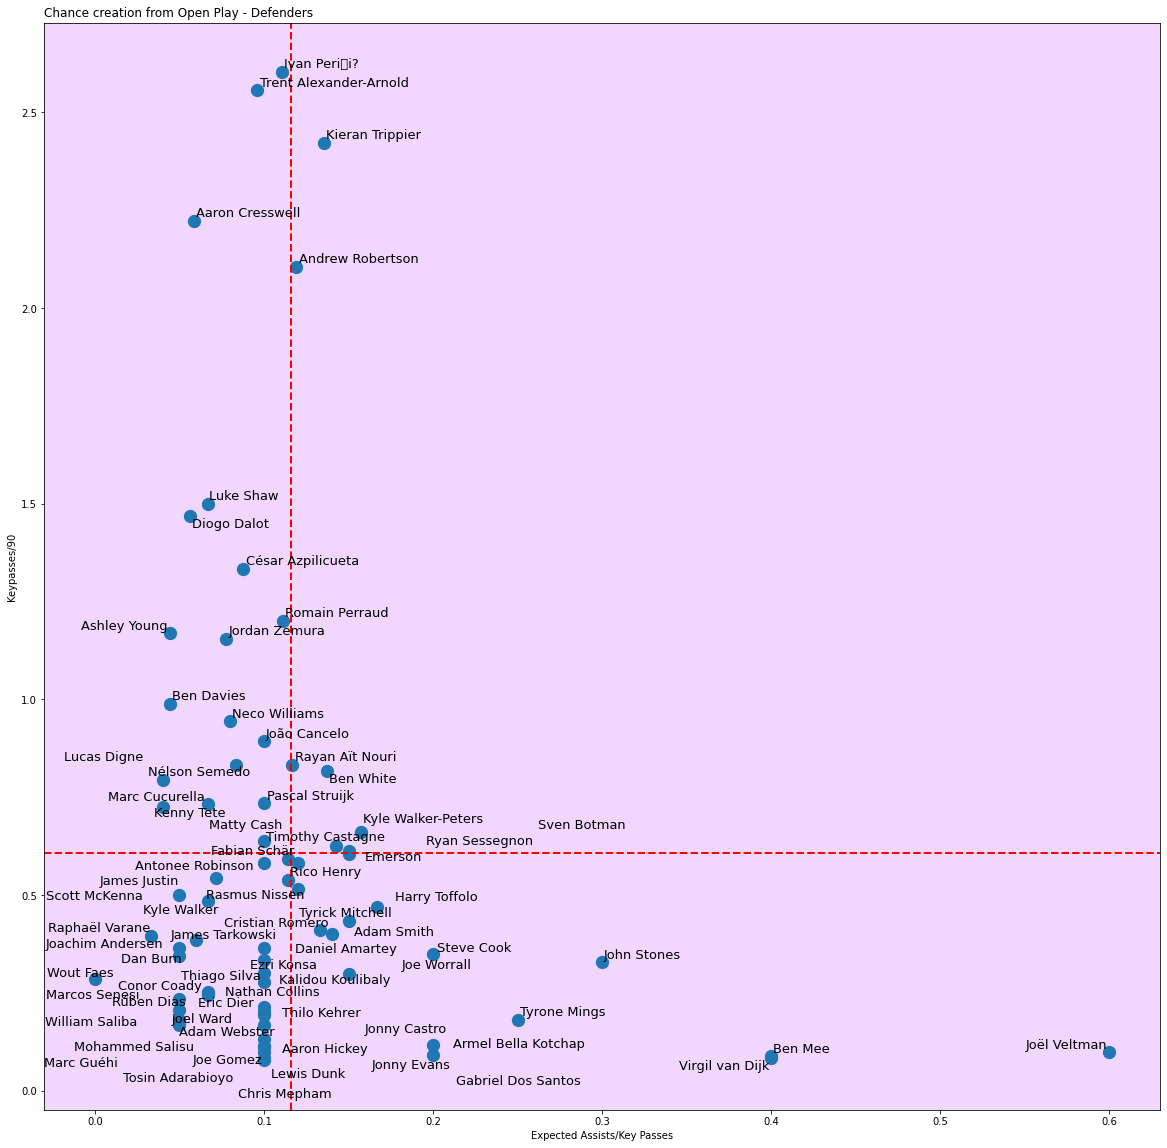

In [ ]:
df2['xA'] = df2['xA'].astype('float')
df2['90s'] = df2['90s'].astype('float')
df2['KP'] = df2['KP'].astype('float')
df2['KP/90'] = df2['KP']/df2['90s']
df2['xA/KP'] = df2['xA']/df2['KP']

fig, ax = plt.subplots(figsize = (20, 20))

ax.scatter(df2['xA/KP'],df2['KP/90'], s =150 )
# plt.locator_params('x', nbins = 5)
texts3=[plt.text(df2['xA/KP'][i], df2['KP/90'][i], df2['Player'][i], size = 13) for i in range(len(df2))]
adjust_text(texts3)
plt.title("Chance creation from Open Play - Defenders", loc = 'left')
plt.ylabel("Keypasses/90")
plt.xlabel("Expected Assists/Key Passes")
ax.set_facecolor('#f1d6fe')
fig.savefig('df2.jpg', bbox_inches='tight', dpi=150)
plt.axhline(y=np.nanmean(df2['KP/90']), color='red', linestyle='--', linewidth=2, label='Avg')
plt.axvline(x=np.nanmean(df2['xA/KP']), color='red', linestyle='--', linewidth=2, label='Avg')
plt.show()

In [ ]:
df3 = pd.read_csv("Dribbling.csv", encoding='latin-1', header = 1)
df3

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Touches,Def Pen,...,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog,Matches
0,1,Brenden Aaronson,us USA,MF,Leeds United,22-013,2000,11.3,512,4,...,27,512,19,49,38.8,27,36,345,54,Matches
1,2,Che Adams,sct SCO,FW,Southampton,26-114,1996,10.1,322,16,...,55,322,7,16,43.8,35,10,249,44,Matches
2,3,Tyler Adams,us USA,MF,Leeds United,23-263,1999,11.0,767,15,...,2,767,2,12,16.7,14,6,441,9,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-041,1997,10.0,578,97,...,3,578,1,2,50.0,1,3,355,1,Matches
4,5,Rayan Aït Nouri,fr FRA,DF,Wolves,21-151,2001,7.2,444,22,...,20,444,13,28,46.4,10,6,278,31,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,459,Jordan Zemura,zw ZIM,DF,Bournemouth,22-355,1999,7.8,376,26,...,11,376,5,13,38.5,11,6,203,15,Matches
459,460,Oleksandr Zinchenko,ua UKR,DF,Arsenal,25-324,1996,4.4,332,6,...,6,332,2,3,66.7,1,3,225,6,Matches
460,461,Hakim Ziyech,ma MAR,MF,Chelsea,29-230,1993,1.5,92,2,...,2,92,4,8,50.0,2,3,69,4,Matches
461,462,Kurt Zouma,fr FRA,DF,West Ham,28-008,1994,12.0,623,138,...,13,623,0,2,0.0,4,0,392,1,Matches


In [ ]:
df3['Succ%'].dtype

dtype('float64')

In [ ]:
df3['90s'] = df3['90s'].astype('float')
df3['Pos'] = df3['Pos'].astype('str')
df3 = df3[df3['90s'] >= 5.56]
df3 = df3.reset_index()
df3 = df3[(df3['Pos'] == 'MF') | (df3['Pos'] == 'MF,FW') | (df3['Pos'] == 'FW,MF')]
df3 = df3.reset_index()
df3

,level_0,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,...,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog,Matches
0,0,0,1,Brenden Aaronson,us USA,MF,Leeds United,22-013,2000,11.3,...,27,512,19,49,38.8,27,36,345,54,Matches
1,2,2,3,Tyler Adams,us USA,MF,Leeds United,23-263,1999,11.0,...,2,767,2,12,16.7,14,6,441,9,Matches
2,13,23,24,Joe Aribo,ng NGA,"MF,FW",Southampton,26-106,1996,10.1,...,40,436,12,31,38.7,26,16,270,37,Matches
3,14,24,25,Adam Armstrong,eng ENG,"FW,MF",Southampton,25-267,1997,8.7,...,28,284,6,27,22.2,14,13,174,33,Matches
4,15,25,26,Stuart Armstrong,sct SCO,MF,Southampton,30-219,1992,6.3,...,16,328,4,13,30.8,11,8,230,21,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,227,451,452,Yoane Wissa,cd COD,"FW,MF",Brentford,26-062,1996,5.9,...,20,182,5,13,38.5,18,16,111,21,Matches
93,229,454,455,Granit Xhaka,ch SUI,MF,Arsenal,30-038,1992,11.8,...,43,691,4,7,57.1,13,12,510,45,Matches
94,230,455,456,Ryan Yates,eng ENG,MF,Nott'ham Forest,24-348,1997,9.5,...,18,388,2,2,100.0,10,9,184,9,Matches
95,232,457,458,Wilfried Zaha,ci CIV,"FW,MF",Crystal Palace,29-359,1992,10.7,...,57,473,25,60,41.7,48,44,367,72,Matches


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 154 missing from current font.
  font.set_text(s, 0, flags=flags)


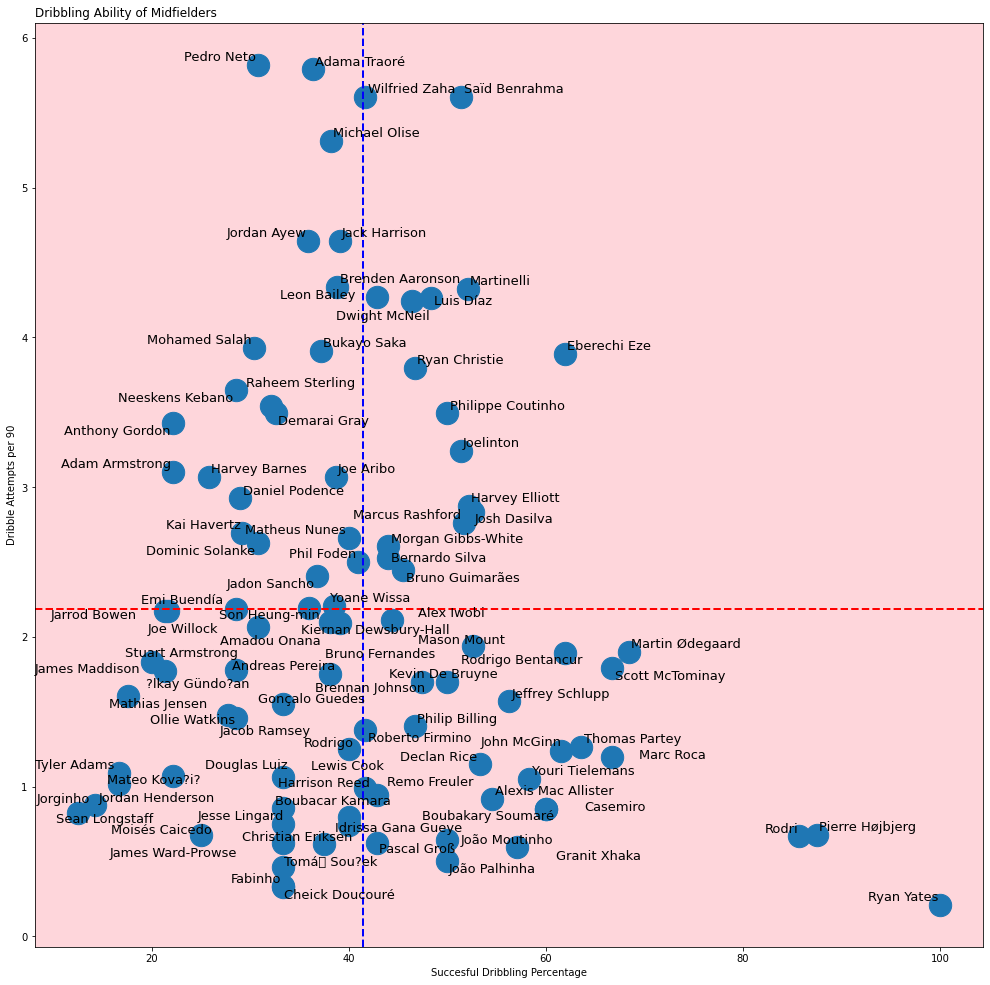

In [ ]:
df3['Att'] = df3['Att'].astype('float')
df3['90s'] = df3['90s'].astype('float')
df3['Succ%	'] = df3['Succ%'].astype('float')
df3['Dribble Attempts per 90'] = df3['Att']/df3['90s']

fig, ax = plt.subplots(figsize = (17, 17))

ax.scatter(df3['Succ%'],df3['Dribble Attempts per 90'], s = 500)
# plt.locator_params('x', nbins = 5)
texts4=[plt.text(df3['Succ%'][i], df3['Dribble Attempts per 90'][i], df3['Player'][i], size = 13) for i in range(len(df3))]
adjust_text(texts4)
plt.title("Dribbling Ability of Midfielders", loc = 'left')
plt.ylabel("Dribble Attempts per 90")
plt.xlabel("Succesful Dribbling Percentage")
ax.set_facecolor('#fed6db')
plt.axhline(y=np.nanmean(df3['Dribble Attempts per 90']), color='red', linestyle='--', linewidth=2, label='Avg')
plt.axvline(x=np.nanmean(df3['Succ%']), color='blue', linestyle='--', linewidth=2, label='Avg')

fig.savefig('df3.jpg', bbox_inches='tight', dpi=150)
plt.show()